# Estudio de la distribución

Indíce de pruebas:
- Histograma (con density)
- Boxplot
- Describe()
- QQplot
- Asiimetría y Curtosis
- Contraste de hipótesis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

import statsmodels.api as sm


## Investigación del corazon

In [2]:
data = pd.read_csv("data.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

### Descriptiva

In [ ]:
data.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


### Distribuciones

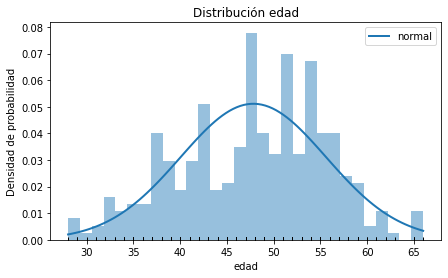

In [ ]:
# Histograma + distribución normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
edad = data["age"]
mu, sigma = stats.norm.fit(edad)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(edad), max(edad), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=edad, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(edad, np.full_like(edad, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución edad')
ax.set_xlabel('edad')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

### Asimetría y Kurtosis

In [ ]:
print('Kursotis:', stats.kurtosis(edad))
print('Skewness:', stats.skew(edad))

Kursotis: -0.5143703879525896
Skewness: -0.28280886591247106


### Boxplot

<AxesSubplot:>

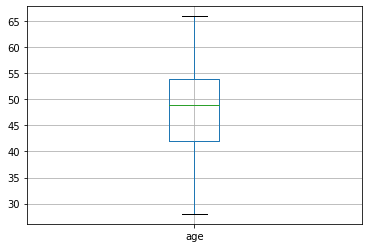

In [ ]:
fig, ax = plt.subplots()
data.boxplot(column="age")

### Gráfico Q-Q

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


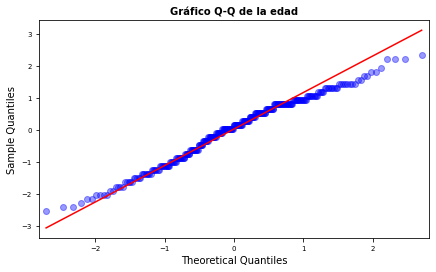

In [ ]:
# Gráfico Q-Q
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    edad,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de la edad', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

### Contraste de hipótesis

In [ ]:
# Shapiro-Wilk test
# H0 = sigue una distribución normal
# H1 = no sigue una distribución normal
shapiro_test = stats.shapiro(edad)
shapiro_test

ShapiroResult(statistic=0.9821943044662476, pvalue=0.0010189646854996681)

En este caso, el valor p es 0.001, lo que indica que hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal. En otras palabras, los datos son significativamente diferentes de una distribución normal.

In [ ]:
# D'Agostino's K-squared test
k2, p_value = stats.normaltest(edad)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 9.136855945514476, p-value = 0.010374255517834219


En este caso, el valor p es 0.01, lo que indica que hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal. En otras palabras, los datos son significativamente diferentes de una distribución normal.

### Conclusiones

**Hemos comprobado que la edad no sigue una distribución normal. Por lo tanto, buscamos otro dataset y volvemos a ejecutar las funciones anteriores.**

## Investigación del beneficio

In [ ]:
df = pd.read_csv("CompanyABCProfit.csv")
df

,Year,Profit(Rs '000)
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764
...,...,...
195,2016,988
196,2017,895
197,2018,-178
198,2019,543


### Descriptiva con describe()

In [ ]:
df["Profit(Rs '000)"].describe()

count     200.000000
mean     1021.990000
std       487.955626
min      -413.000000
25%       724.250000
50%      1024.000000
75%      1318.250000
max      2055.000000
Name: Profit(Rs '000), dtype: float64

Como la media y la mediana se parecen, la distribución puede ser normal.

---



### Distribución normal y histograma

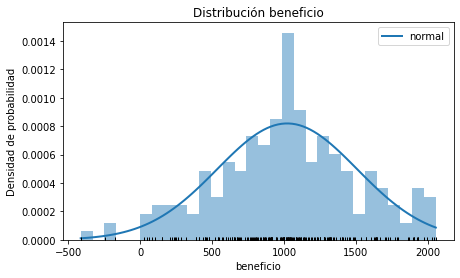

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos profit (beneficio)
profit = df["Profit(Rs '000)"]
mu, sigma = stats.norm.fit(profit)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(profit), max(profit), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=profit, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(profit, np.full_like(profit, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución beneficio')
ax.set_xlabel('beneficio')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

Aunque en el medio del histograma hay valores bastante altos, parece que la distribución es normal.


### Boxplot

<AxesSubplot:>

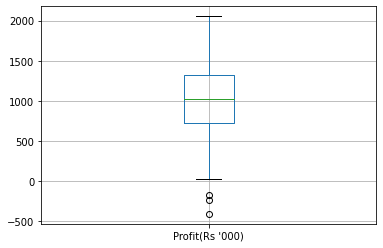

In [ ]:
fig, ax = plt.subplots()
df.boxplot(column="Profit(Rs '000)")

Este boxplot es bastante centrado, por lo tanto parece que la distrubción es normal.

### Gráfico Q-Q

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


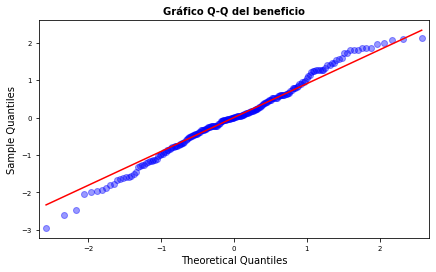

In [ ]:
# Gráfico Q-Q
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    profit,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del beneficio', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Aunque hay pocos valores en los extremos que no siguen buy bien la linea, parece que la distrubción es normal.

### Asimetría y Kurtosis

In [ ]:
## Kurtosis: Comprueba la accumulación de valores por el centro --> si esa accumulación es normal (0: normal/ideal)
## Asimetría: Comprueba si la cura es simetrica (0: simmetrica/ideal)
print('Kursotis:', stats.kurtosis(profit))
print('Skewness:', stats.skew(profit))

Kursotis: -0.0765972285753298
Skewness: -0.12793336180347498


Los curtosis y asismetría se acercan al 0 los dos, por lo tanto parece que la distrubción es normal.

### Contraste de hipotésis

In [ ]:
# Shapiro-Wilk test
# H0 = sigue una distribución normal
# H1 = no sigue una distribución normal
shapiro_test = stats.shapiro(profit)
shapiro_test

ShapiroResult(statistic=0.990578830242157, pvalue=0.21675562858581543)

En este caso, el valor p es 0.22, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal. En otras palabras, los datos no son significativamente diferentes de una distribución normal.

In [ ]:
# D'Agostino's K-squared test
k2, p_value = stats.normaltest(profit)
print(f"Estadístico = {k2}, p-value = {p_value}")


Estadístico = 0.579653805070008, p-value = 0.7483931013159193


En este caso, el valor p es 0.75, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal. En otras palabras, los datos no son significativamente diferentes de una distribución normal.

### Conclusiones

Todas las pruebas indican que la distribución es normal, por lo tanto podemos seguir con el estudio.